In [1]:
import Pyomic
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from scipy.stats import norm
from scipy import stats
import networkx as nx
import datetime
import seaborn as sns
import pandas as pd
from scipy.cluster import hierarchy  
from scipy import cluster   
from sklearn import decomposition as skldec 


from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage,dendrogram

import ERgene

In [6]:
import pandas as pd
data=pd.read_csv('LiverFemale3600.csv')
data.dropna(inplace=True)
data.set_index(data.columns[0],inplace=True)
data.head()

,F2_2,F2_3,F2_14,F2_15,F2_19,F2_20,F2_23,F2_24,F2_26,F2_37,...,F2_324,F2_325,F2_326,F2_327,F2_328,F2_329,F2_330,F2_332,F2_355,F2_357
substanceBXH,,,,,,,,,,,,,,,,,,,,,
MMT00000044,-0.0181,0.0642,0.000064,-0.05800,0.04830,-0.151974,-0.00129,-0.23600,-0.0307,-0.02610,...,0.047700,-0.0488,0.0168,-0.0309,0.02740,-0.0310,0.0660,-0.0199,-0.0146,0.065000
MMT00000046,-0.0773,-0.0297,0.112000,-0.05890,0.04430,-0.093800,0.09340,0.02690,-0.1330,0.07570,...,-0.049200,-0.0350,-0.0738,-0.1730,-0.07380,-0.2010,-0.0820,-0.0939,0.0192,-0.049900
MMT00000051,-0.0226,0.0617,-0.129000,0.08710,-0.11500,-0.065026,0.00249,-0.10200,0.1420,-0.10200,...,0.000612,0.1210,0.0996,0.1090,0.02730,0.1200,-0.0629,-0.0395,0.1090,0.000253
MMT00000080,-0.0487,0.0582,-0.048300,-0.03710,0.02510,0.085043,0.04450,0.00167,-0.0680,0.00567,...,0.113000,-0.0859,-0.1340,0.0639,0.00731,0.1240,-0.0212,0.0870,0.0512,0.024300
MMT00000102,0.1760,-0.1890,-0.065000,-0.00846,-0.00574,-0.018072,-0.12500,-0.06820,0.1250,0.00998,...,-0.080000,-0.1200,0.1230,0.1870,0.05410,0.0699,0.0708,0.1450,-0.0399,0.037500


...correlation coefficient matrix is being calculated
...direction correlation have been saved
...calculate time 0:00:04.636599
...indirect correlation matrix is being calculated
...indirection correlation have been saved
...calculate time 0:00:01.054008
...soft_threshold is being calculated
...appropriate soft_thresholds: 6.0
...distance have being calculated
...geneTree have being calculated
...dynamicMods have being calculated
..cutHeight not given, setting it to 448.9691031625521  ===>  99% of the (truncated) height range in dendro.


D:\Anaconda\lib\site-packages\pandas\core\series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


..done.
...total: 12


D:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
D:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
D:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


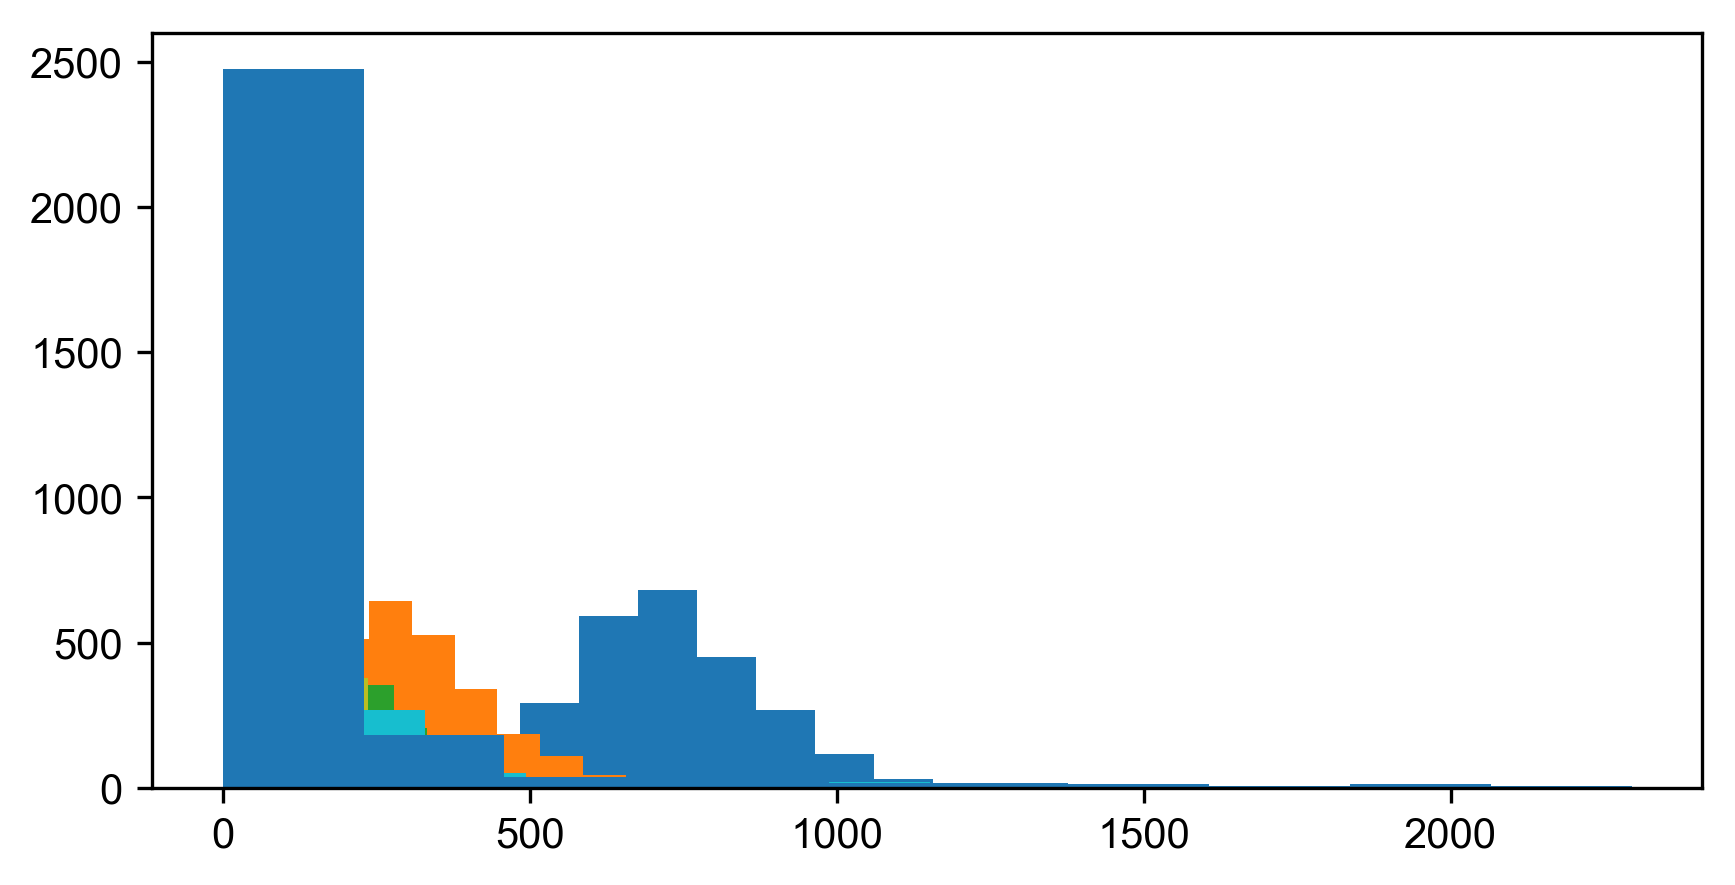

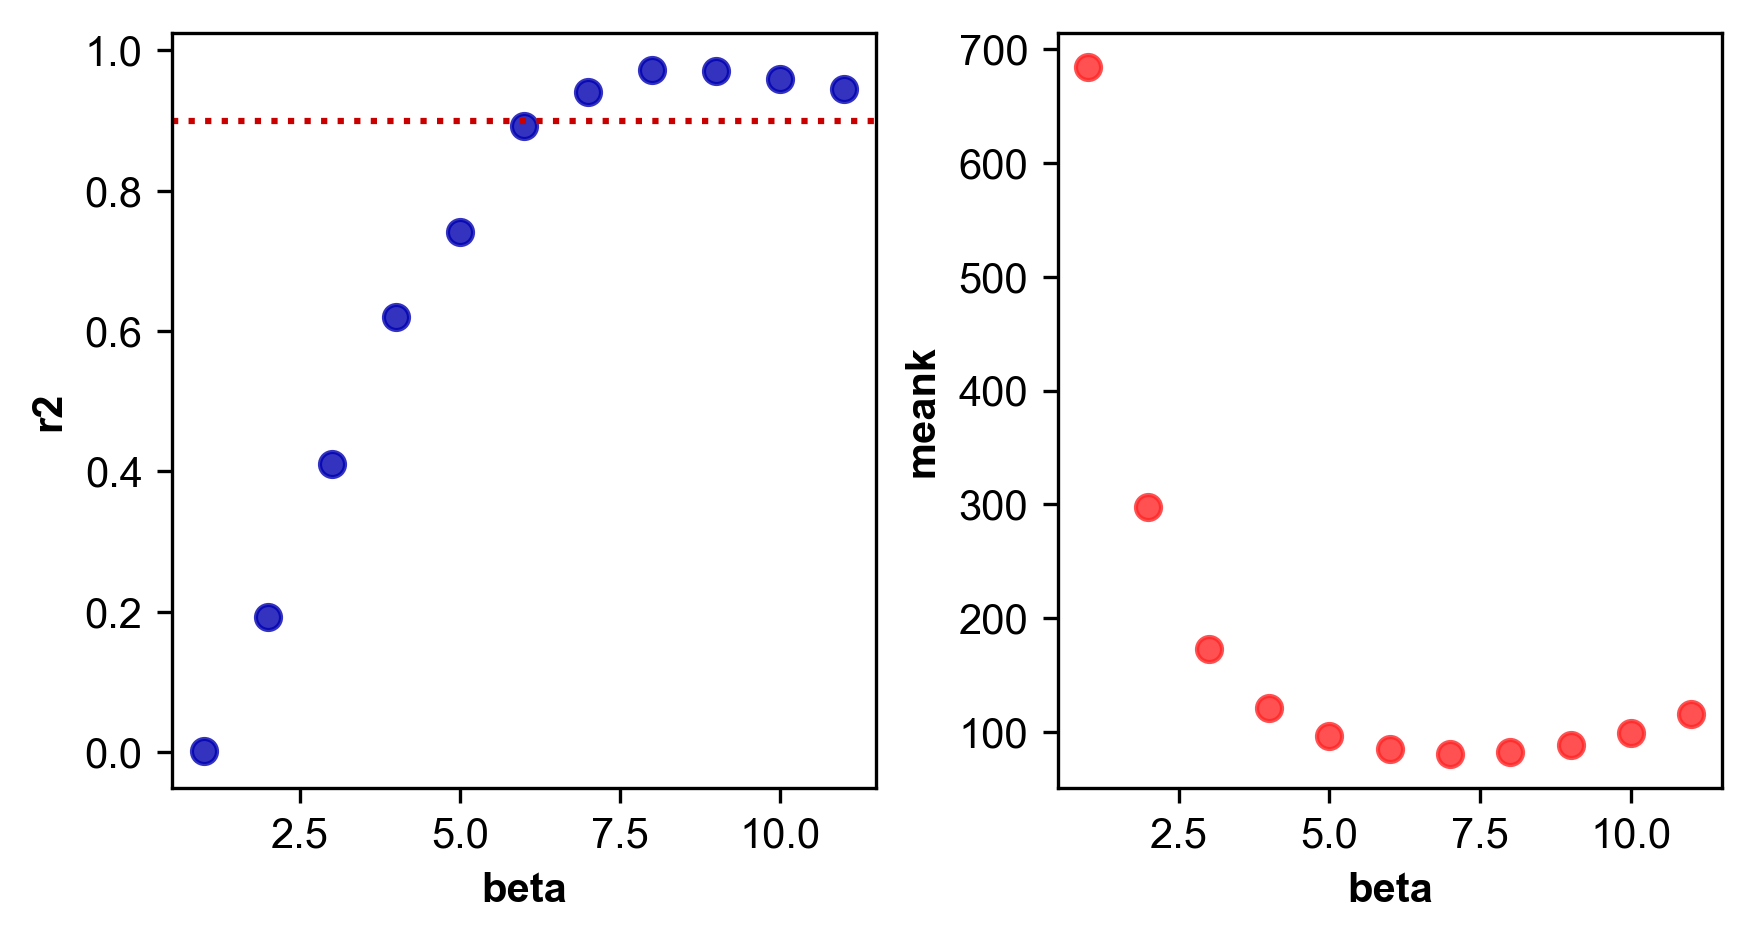

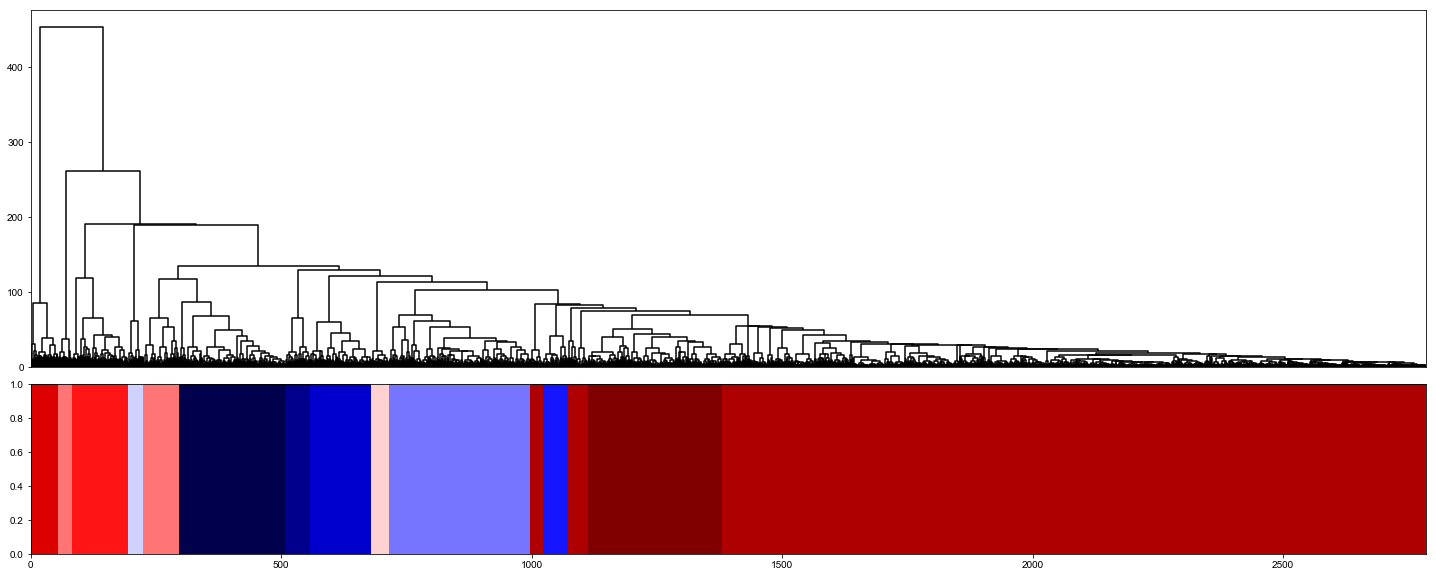

In [7]:
#Identification of similar co-expression gene/protein module
table=Pyomic.Trans_corr_matrix(data,
                      method='pearson')
#Select module from actual corr matrix
module=Pyomic.Select_module(table,
                  linkage_method='ward',
                  minClusterSize=30,
                  deepSplit=2,
                 )

In [6]:
table.iloc[0:5,0:5]

substanceBXH,MMT00000044,MMT00000046,MMT00000051,MMT00000080,MMT00000102
substanceBXH,,,,,
MMT00000044,1.000000e+00,1.197504e-05,4.341150e-06,3.256149e-09,2.850266e-05
MMT00000046,1.197504e-05,1.000000e+00,1.492743e-01,1.558217e-08,1.980153e-01
MMT00000051,4.341150e-06,1.492743e-01,1.000000e+00,5.665705e-08,7.847442e-07
MMT00000080,3.256149e-09,1.558217e-08,5.665705e-08,1.000000e+00,1.121383e-06
MMT00000102,2.850266e-05,1.980153e-01,7.847442e-07,1.121383e-06,1.000000e+00


In [5]:
module.head()

,ivl,module,name
0,52,10,MMT00001732
1,702,10,MMT00021266
2,1693,10,MMT00051462
3,2735,10,MMT00081299
4,680,10,MMT00020632


...PCA analysis have being done
...co-analysis have being done


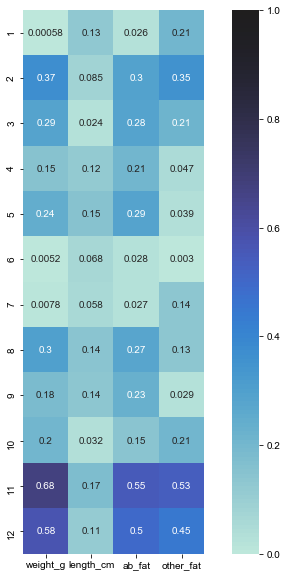

In [7]:
#Correlation analysis between gene modules and traits
cha=pd.read_csv('character.csv')
cha.set_index(cha.columns[0],inplace=True)
comat=Pyomic.Analysis_cocharacter(data,
             character=cha,
             module=module)

In [8]:
comat

,weight_g,length_cm,ab_fat,other_fat
1,0.000579,0.130891,0.025539,0.208714
2,0.370098,0.084585,0.295754,0.351596
3,0.285441,0.023763,0.281423,0.213187
4,0.150483,0.122483,0.205454,0.047039
5,0.244029,0.152480,0.288425,0.038686
6,0.005157,0.067767,0.027740,0.002952
7,0.007820,0.058246,0.027043,0.138332
8,0.299864,0.143134,0.273537,0.134064
9,0.179886,0.137660,0.230412,0.029496
10,0.203550,0.031582,0.146253,0.207015


In [24]:
res1.head()

,pvalue,FoldChange,log(pvalue),log2FC,sig,size
Protein IDs,,,,,,
F6ZLC6,0.589270,3.036977,0.229686,-1.602636,normal,0.303698
A0A1L1SQV7,0.316531,2.551495,0.499584,-1.351343,normal,0.255150
Q01149,0.367158,3.407940,0.435147,-1.768900,normal,0.340794
Q5RIU1,0.221762,2.809577,0.654113,-1.490353,normal,0.280958
Q3V0W6,0.644673,2.395504,0.190661,-1.260329,normal,0.239550


up: 96
down: 25


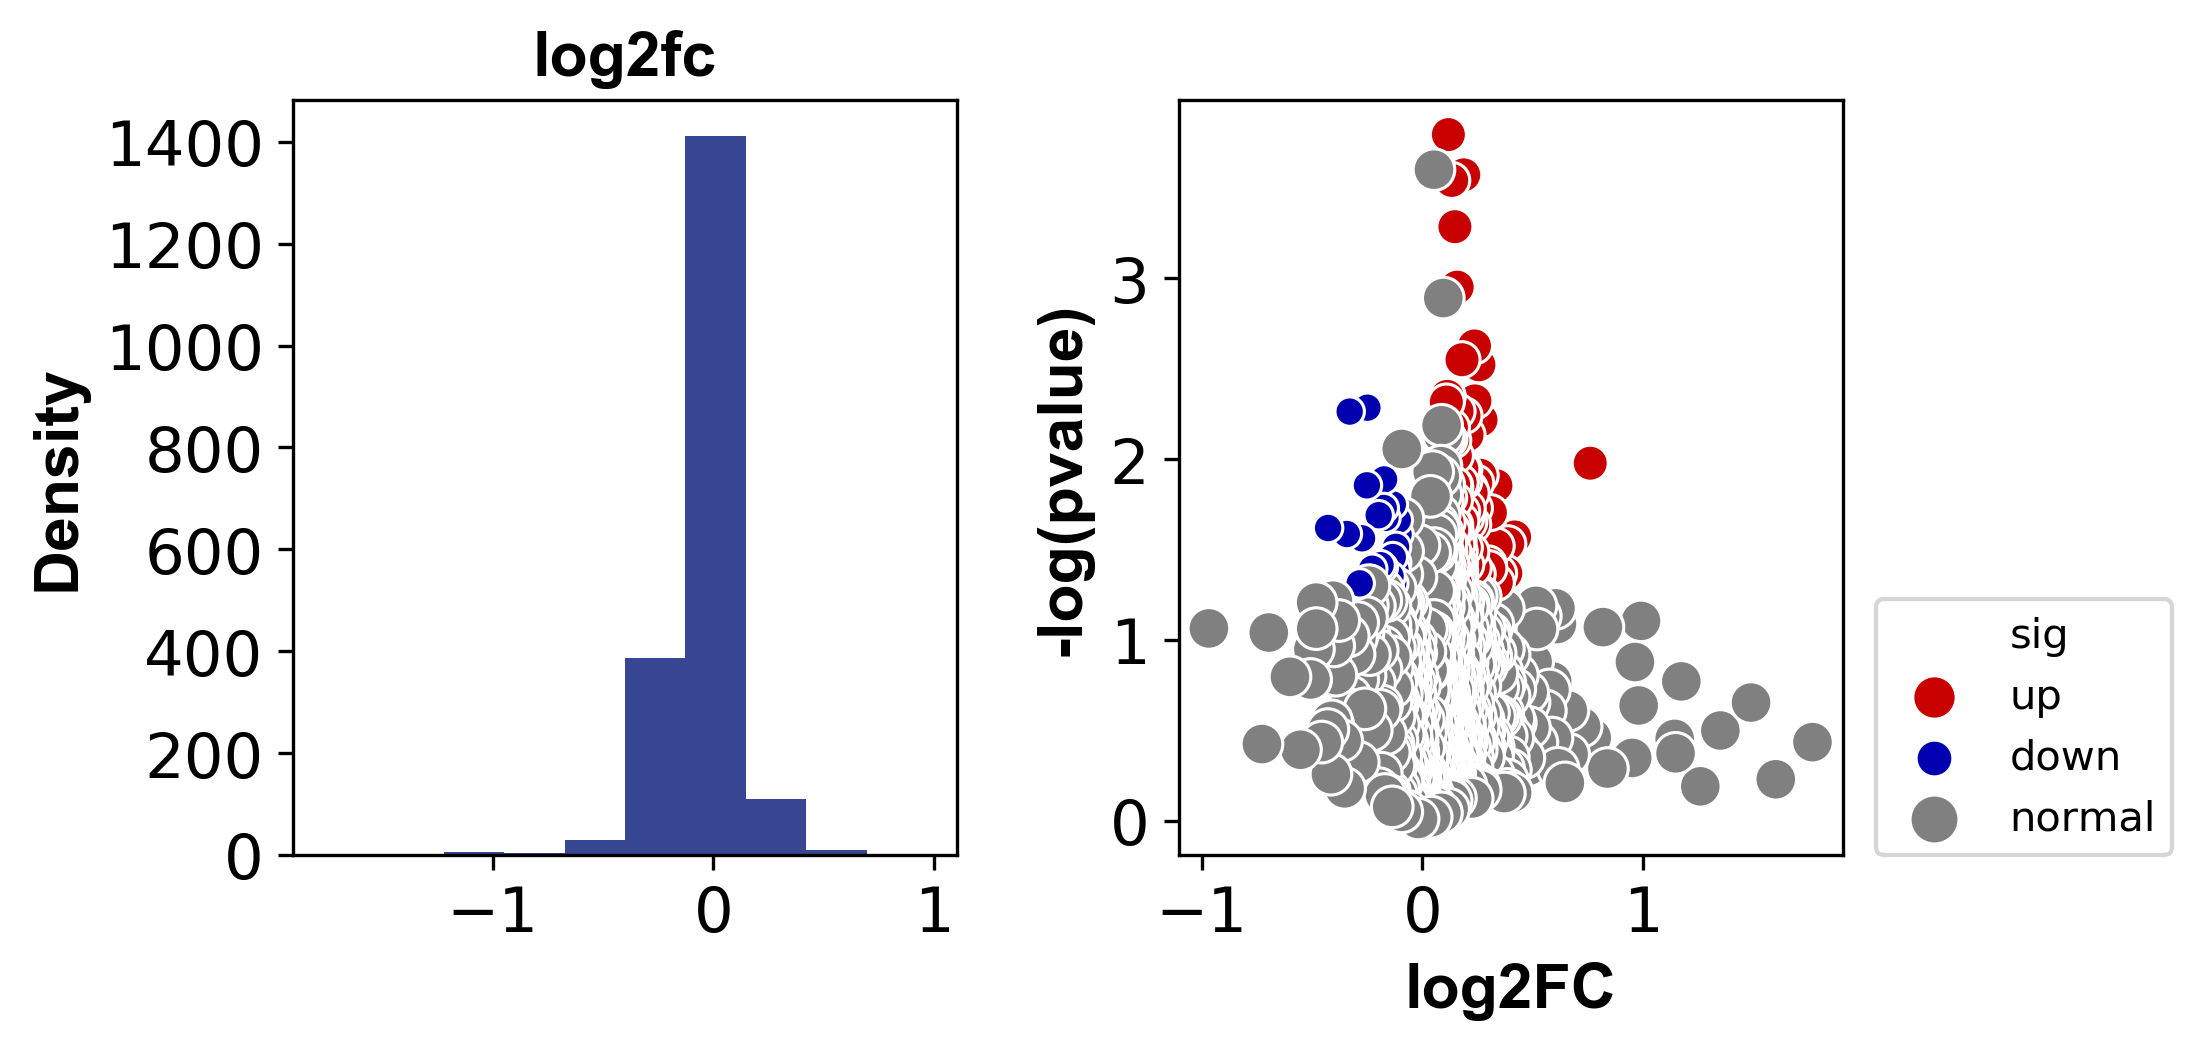

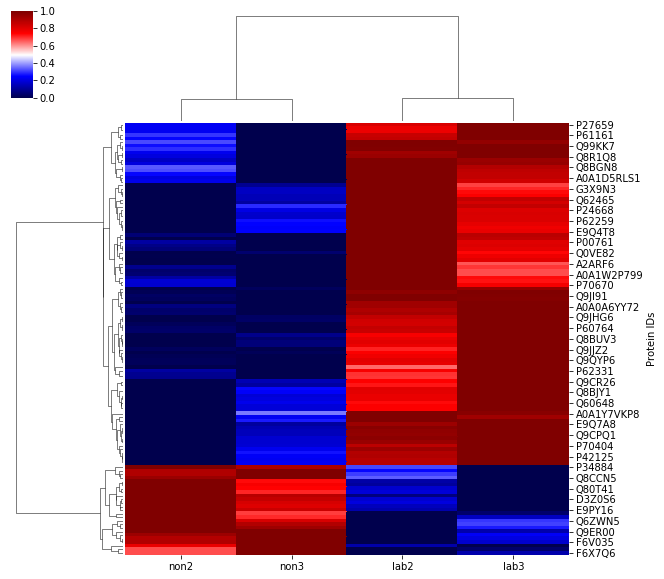

In [3]:
genedata=pd.read_csv('testa.csv')
genedata=genedata.dropna()
genedata=genedata.set_index(genedata.columns[0])
#Screening of differentially expressed genes/proteins
res1=Pyomic.find_DEG(genedata,
                     eg=['lab2','lab3'],
                     cg=['non2','non3'],
                     log2fc=0.1,
                     cmap="seismic",
                    )

0.03227859464846009 *
0.04396375161005844 *
0.02231607866051603 *
0.014419865144144303 *
0.042694694644659095 *


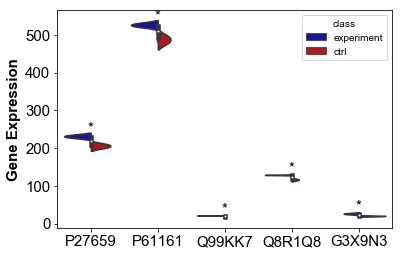

In [32]:
Pyomic.Plot_gene_expression(genedata,['P27659','P61161','Q99KK7','Q8R1Q8','G3X9N3'],eg=['lab2','lab3'],cg=['non2','non3'])

0.040802435771615145 *
0.04365472324054277 *
0.037239296649186626 *
0.017789761325734794 *
0.01293184874728137 *


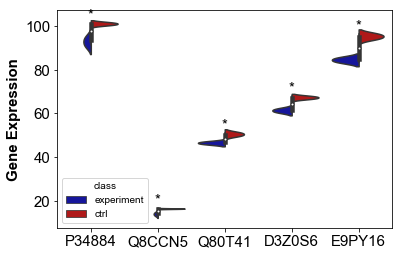

In [33]:
Pyomic.Plot_gene_expression(genedata,['P34884','Q8CCN5','Q80T41','D3Z0S6','E9PY16'],eg=['lab2','lab3'],cg=['non2','non3'])

In [29]:
data=pd.read_csv('LiverFemale3600.csv')
data=data.set_index(data.columns[0])

mapping=pd.read_csv('GeneAnnotation.csv')
data1=Pyomic.ID_mapping(data.dropna(),mapping,'substanceBXH','gene_symbol')

In [31]:
data.iloc[0:5,0:5]

,F2_2,F2_3,F2_14,F2_15,F2_19
substanceBXH,,,,,
MMT00000044,-0.01810,0.0642,0.000064,-0.0580,0.04830
MMT00000046,-0.07730,-0.0297,0.112000,-0.0589,0.04430
MMT00000051,-0.02260,0.0617,-0.129000,0.0871,-0.11500
MMT00000076,-0.00924,-0.1450,0.028700,-0.0439,0.00425
MMT00000080,-0.04870,0.0582,-0.048300,-0.0371,0.02510


In [32]:
data1.iloc[0:5,0:5]

,F2_2,F2_3,F2_14,F2_15,F2_19
1700007N18Rik,-0.0181,0.0642,0.000064,-0.05800,0.04830
Mast2,-0.0773,-0.0297,0.112000,-0.05890,0.04430
Ankrd32,-0.0226,0.0617,-0.129000,0.08710,-0.11500
Ldb2,-0.0487,0.0582,-0.048300,-0.03710,0.02510
Rdhs,0.1760,-0.1890,-0.065000,-0.00846,-0.00574


calculate time:0.46s
['Atp1a3', 'Sptan1', 'Sptbn1', 'Pkm', 'Map1a', 'Dync1h1', 'Ckb', 'Ina', 'Ank2', 'Cltc', 'Bsn', 'Hsp90ab1', 'Camk2a', 'Atp1a1', 'Stxbp1', 'Nefm', 'Dnm1', 'Slc1a2', 'Camk2b', 'Mbp']


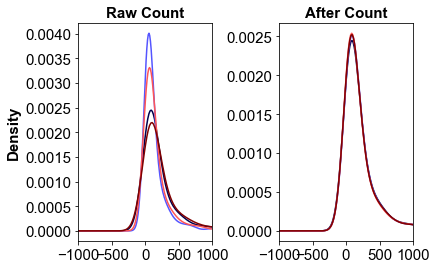

In [20]:
data=pd.read_csv('test.csv')
data=data.set_index(data.columns[0])
#Eliminate the sample batch effect
normdata=Pyomic.Density_norm(data,
                      depth=2,
                      legend=False,
                      norm_by=0,
                      xlim=1000,
                     )

In [36]:
data.head()

,lab2,lab3,non2,non3
genename,,,,
Rbbp7,3.199028,0.000000,0.000000,1.210764
Pafah1b2,61.878472,14.433681,11.759722,20.620139
Col1a2,39.829861,100.621528,14.347917,46.003472
Pimreg,12.568750,17.022917,5.023264,8.711806
1700022I11Rik,4.738889,0.000000,0.000000,2.273854


In [35]:
normdata.head()

,lab2,lab3,non2,non3
genename,,,,
Rbbp7,3.199028,0.000000,0.000000,1.053359
Pafah1b2,61.878472,22.991400,15.323370,17.939428
Col1a2,39.829861,160.279962,18.695887,40.022815
Pimreg,12.568750,27.115792,6.545506,7.579232
1700022I11Rik,4.738889,0.000000,0.000000,1.978243


In [38]:
module.head()

,ivl,module,name
0,52,10,MMT00001732
1,702,10,MMT00021266
2,1693,10,MMT00051462
3,2735,10,MMT00081299
4,680,10,MMT00020632


In [14]:
module=module.set_index(module['name'])
mol=module[module['module']==11].dropna()
mapping=pd.read_csv('GeneAnnotation.csv')
mol1=Pyomic.ID_mapping(mol,mapping,'substanceBXH','gene_symbol')
mol1.head()

,ivl,module,name
2210415F13Rik,932,11,MMT00028707
AI747448,698,11,MMT00021101
D630035O19Rik,746,11,MMT00022995
Eps8l3,834,11,MMT00025626
Slc7a9,22,11,MMT00000713


In [15]:
mol1.to_csv('mol11.csv')

In [13]:
mol1=pd.read_csv('mol11.csv')
mol1.head()

,name,ivl,module,name.1
0,MMT00028707,932,11,MMT00028707
1,MMT00021101,698,11,MMT00021101
2,MMT00022995,746,11,MMT00022995
3,MMT00025626,834,11,MMT00025626
4,MMT00000713,22,11,MMT00000713


AxesSubplot(0.125,0.125;0.775x0.755)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2013,HSA00100 BIOSYNTHESIS OF STEROIDS,9/24,0.000008,0.001288,0,0,9.026988,105.882816,FDPS;IDI1;SQLE;NSDHL;PMVK;MVD;DHCR7;LSS;SC4MOL
1,KEGG_2013,HSA04060 CYTOKINE CYTOKINE RECEPTOR INTERACTION,33/257,0.000072,0.005783,0,0,2.234797,21.308560,CSF3R;FLT1;FLT4;IL1RAP;TNF;CSF2RA;EGFR;CXCL5;I...
2,KEGG_2013,HSA00520 NUCLEOTIDE SUGARS METABOLISM,4/6,0.000208,0.011109,0,0,29.990400,254.214946,UGDH;GALE;GALT;UGP2
3,KEGG_2013,HSA00252 ALANINE AND ASPARTATE METABOLISM,8/33,0.000791,0.031658,0,0,4.807961,34.336695,GOT1;GPT2;ASL;DLAT;AGXT;ASPA;CRAT;ASS1
4,KEGG_2013,HSA05010 ALZHEIMERS DISEASE,7/28,0.001382,0.044221,0,0,5.005346,32.956693,C1QB;C1QA;BACE2;MME;CASP3;IL1B;TNF


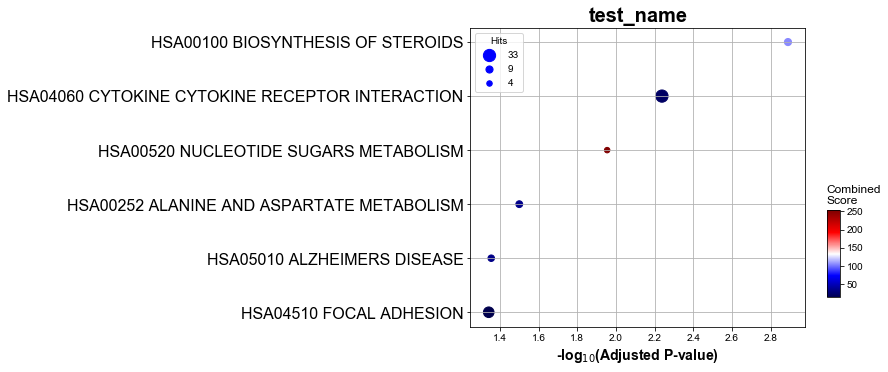

In [16]:
mol1=pd.read_csv('mol11.csv')
mol1=mol1.set_index(mol1.columns[0])

#enrichment of KEGG and GO
res_KEGG=Pyomic.enrichment_KEGG(mol1.index.dropna().tolist(),
                            gene_sets=['KEGG_2013'],
                            cutoff=0.5)
res_GO=Pyomic.enrichment_GO(mol1.index.dropna().tolist(),
                            go_mode='Bio',
                            cutoff=0.5)
#result.csv file come from function(find_DEG)
result=pd.read_csv('result.csv')
result=result.set_index(result.columns[0])

#enrichment of GSEA
res=Pyomic.enrichment_GSEA(result)
Pyomic.Plot_GSEA(res,0)

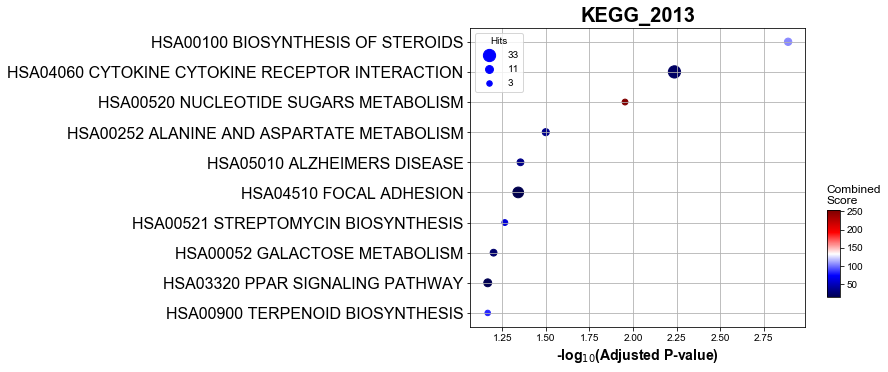

In [61]:
from gseapy.plot import barplot, dotplot
dotplot(res1, title='KEGG_2013',cmap='seismic',cutoff=10)

In [8]:
res2=Pyomic.enrichment_GO(mol1.index.dropna().tolist(),
                            go_mode='Bio',
                            cutoff=0.5)
res2.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2018,regulation of natural killer cell chemotaxis (...,5/7,0.000018,0.050779,0,0,37.518014,409.577482,CCL7;CCL5;CCL4;CCL3;CCL2
1,GO_Biological_Process_2018,cholesterol biosynthetic process (GO:0006695),10/35,0.000039,0.050779,0,0,6.019614,61.079222,IDI1;FDPS;ACLY;SQLE;NSDHL;PMVK;MVD;DHCR7;LSS;A...
2,GO_Biological_Process_2018,secondary alcohol biosynthetic process (GO:190...,10/36,0.000051,0.050779,0,0,5.787781,57.176042,IDI1;FDPS;ACLY;SQLE;NSDHL;PMVK;MVD;DHCR7;LSS;A...
3,GO_Biological_Process_2018,regulation of steroid biosynthetic process (GO...,11/44,0.000063,0.050779,0,0,5.018235,48.514795,IDI1;FDPS;SQLE;BMP2;FASN;PMVK;MVD;DHCR7;FGFR4;...
4,GO_Biological_Process_2018,cellular response to cytokine stimulus (GO:007...,50/456,0.000086,0.054901,0,0,1.875931,17.570898,CSF3R;IL1RAP;TNF;CASP3;ITGAX;ANKRD1;TIMP1;LBP;...


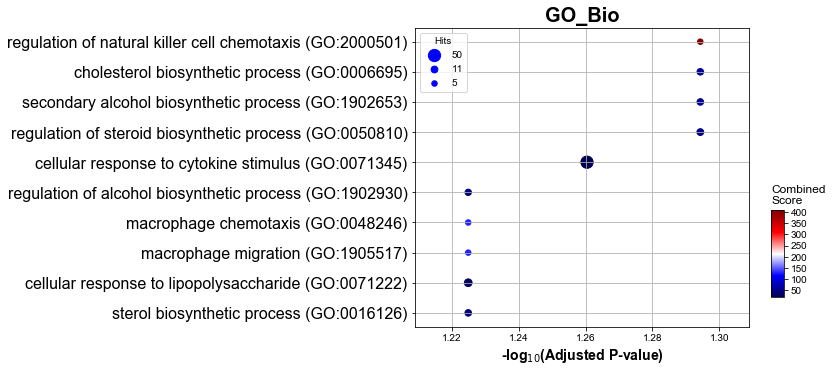

In [9]:
from gseapy.plot import barplot, dotplot
dotplot(res2, title='GO_Bio',cmap='seismic',cutoff=10)

calculate time:0.22s
['Atp1a3', 'Sptan1', 'Sptbn1', 'Pkm', 'Map1a', 'Dync1h1', 'Ckb', 'Ina', 'Ank2', 'Cltc', 'Bsn', 'Hsp90ab1', 'Camk2a', 'Atp1a1', 'Stxbp1', 'Nefm', 'Dnm1', 'Slc1a2', 'Camk2b', 'Mbp']


,lab2,lab3,non2,non3
PAFAH1B2,61.878472,22.991400,15.323370,17.939428
COL1A2,39.829861,160.279962,18.695887,40.022815
FAM64A,12.568750,27.115792,6.545506,7.579232
ECE2,15.166667,25.145132,7.082104,10.780392
NDUFS8,366.145833,325.056547,325.913439,311.023399


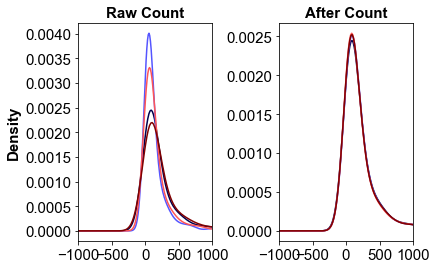

In [27]:
data=pd.read_csv('test.csv')
data=data.set_index(data.columns[0])
#Eliminate the sample batch effect
normdata=Pyomic.Density_norm(data,
                      depth=2,
                      legend=False,
                      norm_by=0,
                      xlim=1000,
                     )
mapping=pd.read_csv('C:/Users/FernandoZeng/Downloads/string_mapping.tsv',sep='\t')

data1=Pyomic.ID_mapping(normdata.dropna(),mapping,'queryItem','preferredName')
data1.head()

In [22]:
def Density_norm(data,
                depth=2,
                legend=False,
                norm_by=0,
                xlim=-1,
                ylim=-1):
    '''
    The batch effect of samples was eliminated and the data was normalized

    Parameters
    ----------
    data:pandas.DataFrame
        DataFrame of data points with each entry in the form:[sample1','sample2'...],index=gene_name
    depth:int
        Number of samples used
        Accuracy of endogenous reference gene,must be larger that 2
        The larger the number, the fewer genes are screened out,Accuracy improvement
    legend:bool
        Whether to display the diagram legend
    norm_by:int
        When the value is 0, the first reference gene screened was used for normalization
    xlim:float
        When the value is not -1,the abscissa range of the generated graph is [-xlim,xlim] 
    ylim:float
        When the value is not -1,the ordinate range of the generated graph is [0,ylim] 

    Returns
    ----------
    result:pandas.DataFrame
        A expression data matrix that normalized
    '''

    #plt_set
    font1 = {'family': 'Arial','weight' : 'bold','size'   : 15}
    my_dpi=300
    fig=plt.figure(figsize=(2000/my_dpi, 1000/my_dpi), dpi=my_dpi)
    grid = plt.GridSpec(1, 4, wspace=2, hspace=0.1)
    

    #raw data
    ax1=plt.subplot(grid[0,0:2])
    data.plot(kind = 'density',legend=legend,fontsize=15,colormap='seismic',ax=ax1)
    plt.ylabel('Density',font1)
    plt.title('Raw Count',font1)
    if (xlim!=-1):
        plt.xlim(0-xlim,xlim)
    if (ylim!=-1):
        plt.ylim(0,ylim)

    #normalized
    ERlist=ERgene.FindERG(data,depth)
    data2=ERgene.normalizationdata(data,ERlist[norm_by])

    #After data
    ax2=plt.subplot(grid[0,2:4])
    data2.plot(kind='density',legend=legend,fontsize=15,colormap='seismic',ax=ax2)
    plt.ylabel('',font1)
    plt.title('After Count',font1)
    if (xlim!=-1):
        plt.xlim(0-xlim,xlim)
    if (ylim!=-1):
        plt.ylim(0,ylim)
    plt.savefig("norm.png",dpi=300,bbox_inches = 'tight')
    return data2

calculate time:0.21s
['Atp1a3', 'Sptan1', 'Sptbn1', 'Pkm', 'Map1a', 'Dync1h1', 'Ckb', 'Ina', 'Ank2', 'Cltc', 'Bsn', 'Hsp90ab1', 'Camk2a', 'Atp1a1', 'Stxbp1', 'Nefm', 'Dnm1', 'Slc1a2', 'Camk2b', 'Mbp']


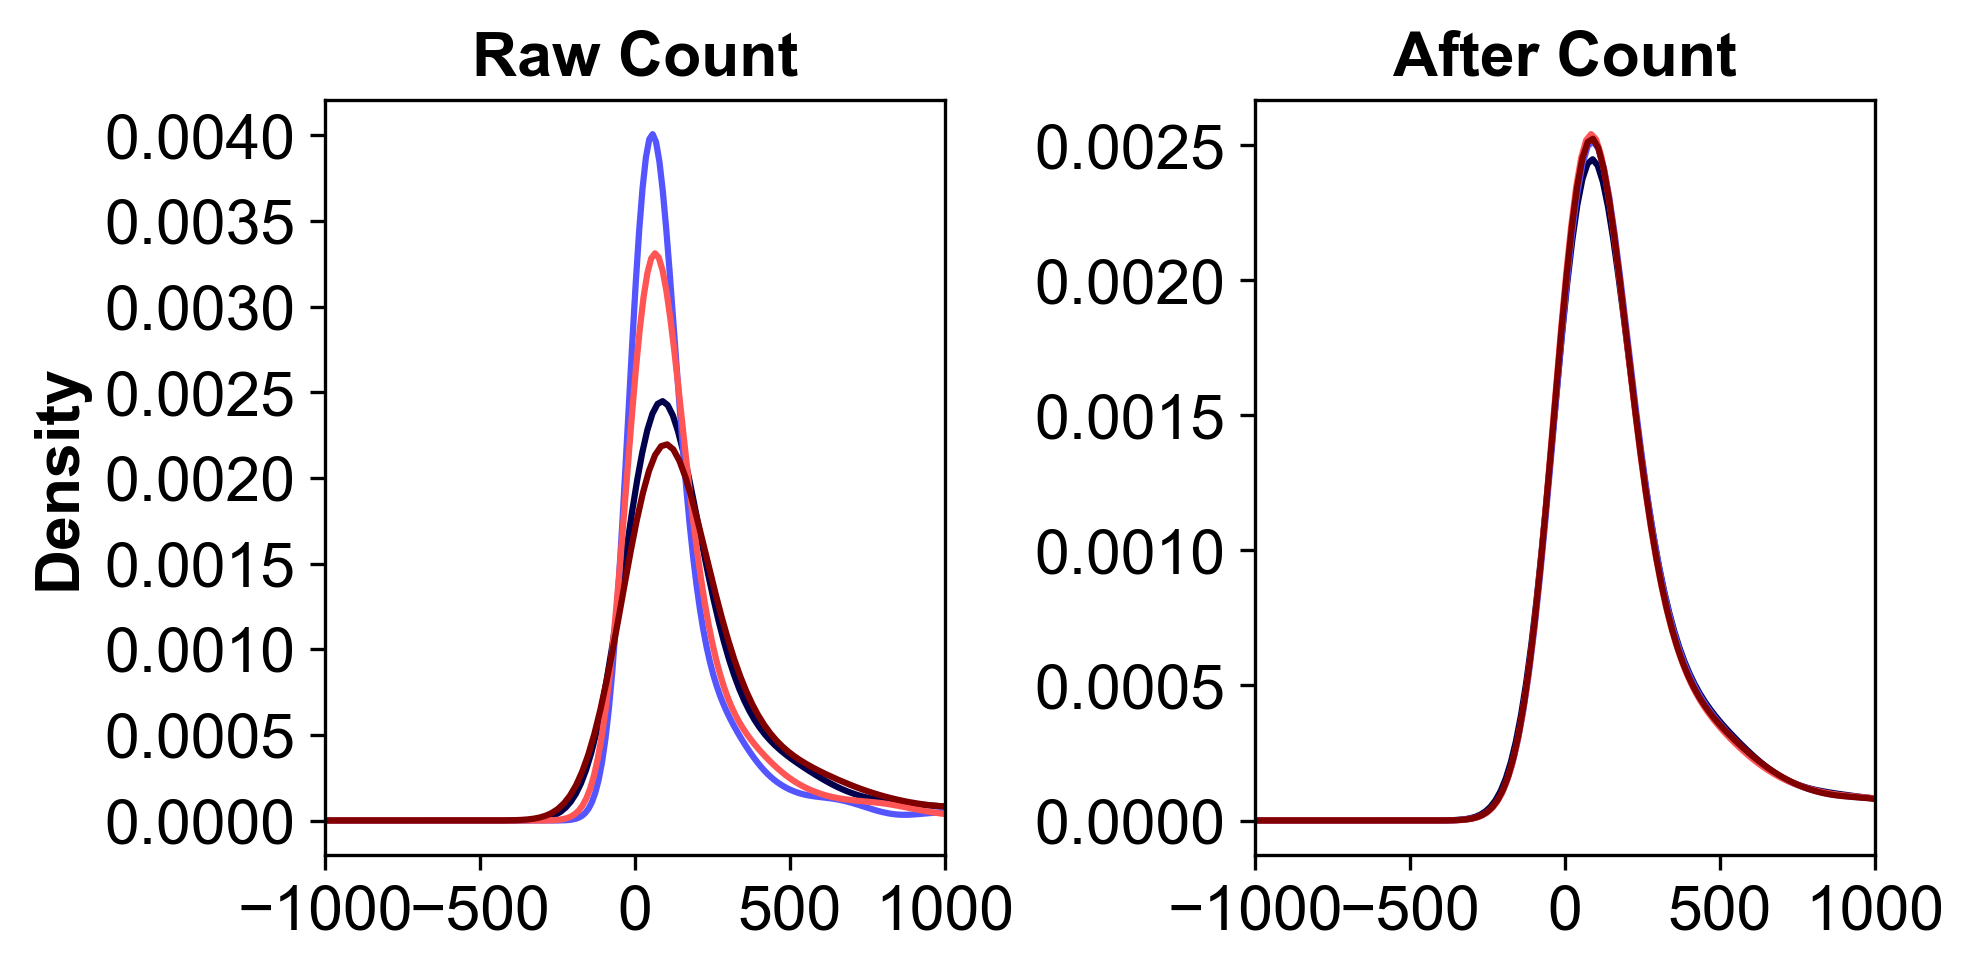

In [25]:
data=pd.read_csv('test.csv')
data=data.set_index(data.columns[0])
#Eliminate the sample batch effect
normdata=Density_norm(data,
                      depth=2,
                      legend=False,
                      norm_by=0,
                      xlim=1000,
                     )

calculate time:0.21s
['Atp1a3', 'Sptan1', 'Sptbn1', 'Pkm', 'Map1a', 'Dync1h1', 'Ckb', 'Ina', 'Ank2', 'Cltc', 'Bsn', 'Hsp90ab1', 'Camk2a', 'Atp1a1', 'Stxbp1', 'Nefm', 'Dnm1', 'Slc1a2', 'Camk2b', 'Mbp']
up: 24
down: 93


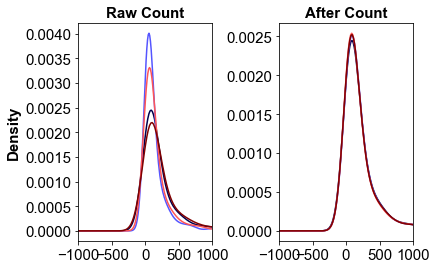

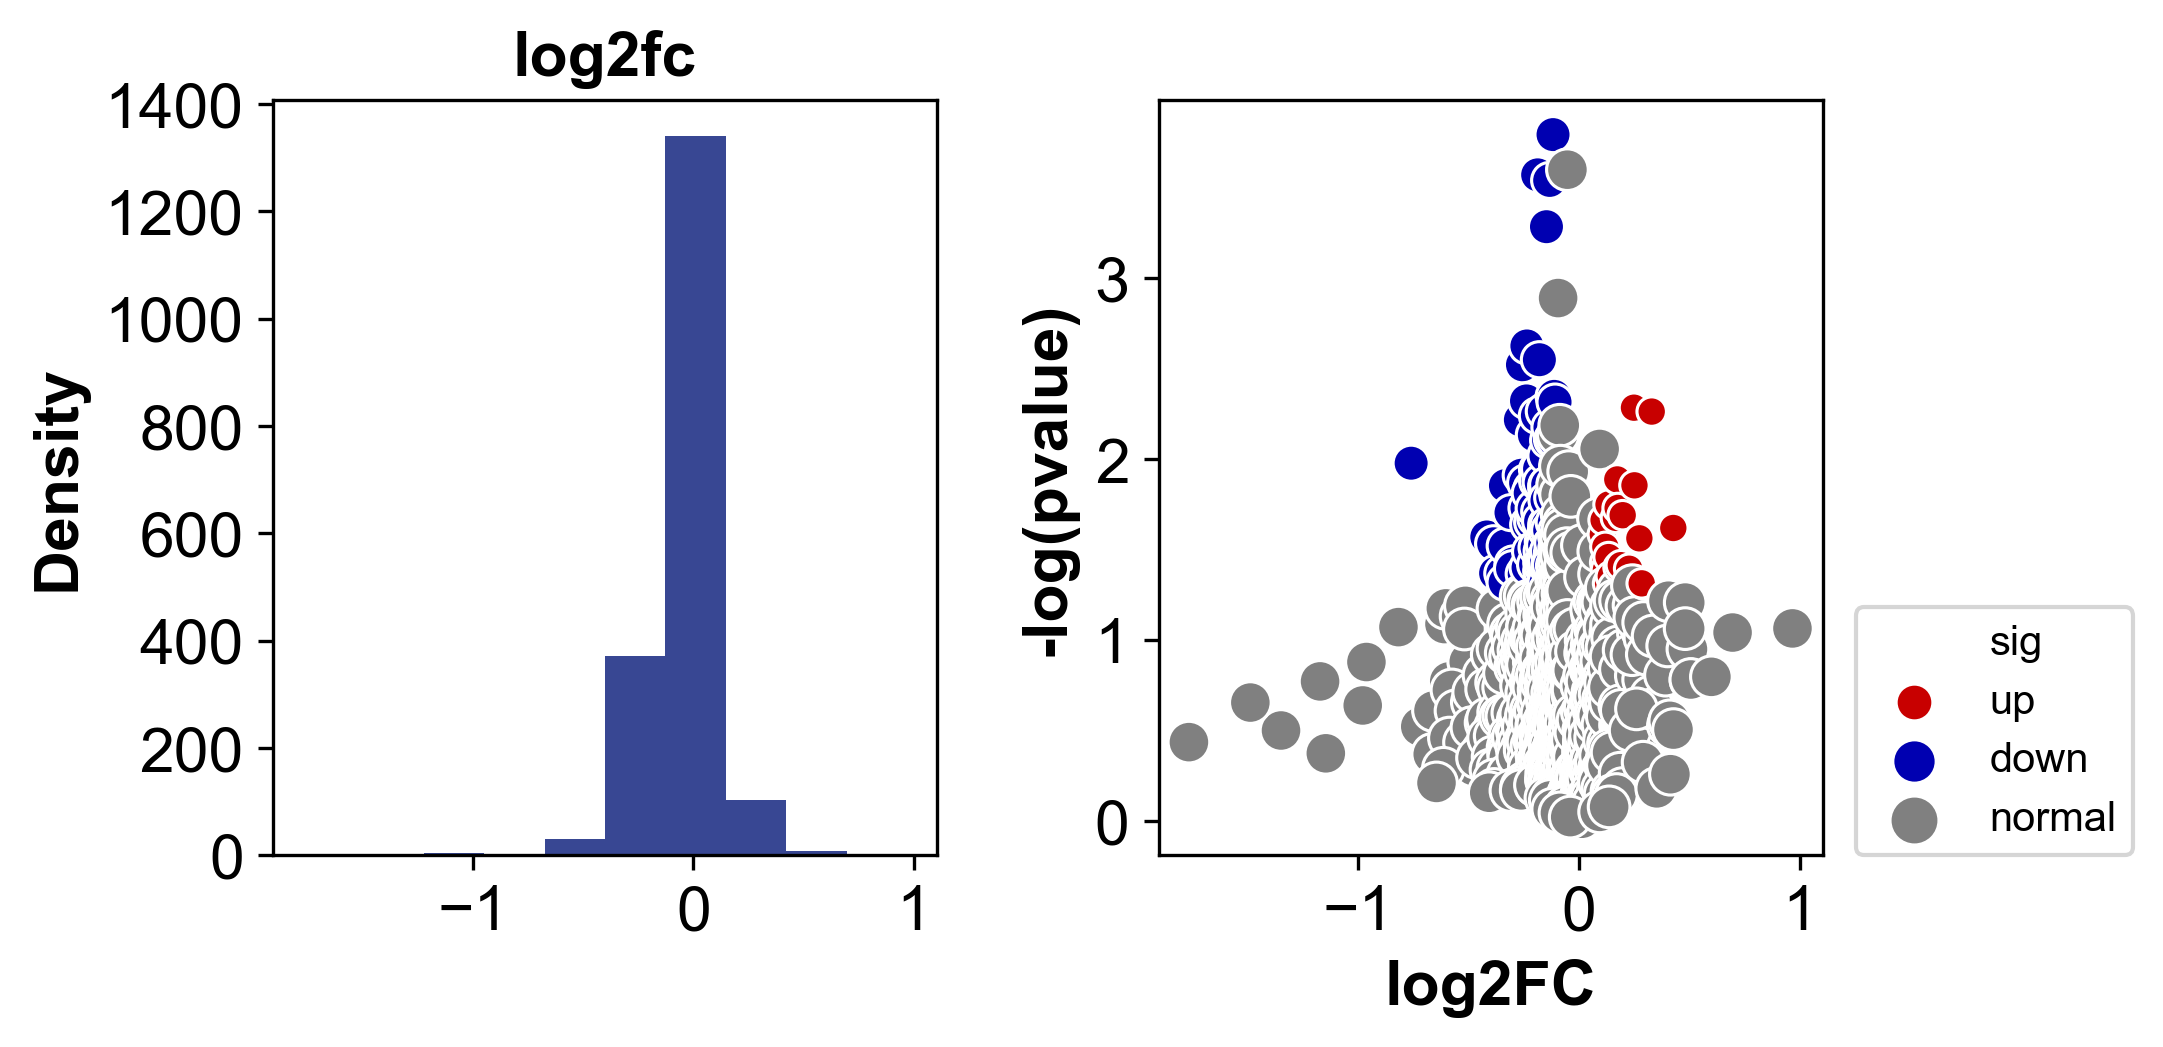

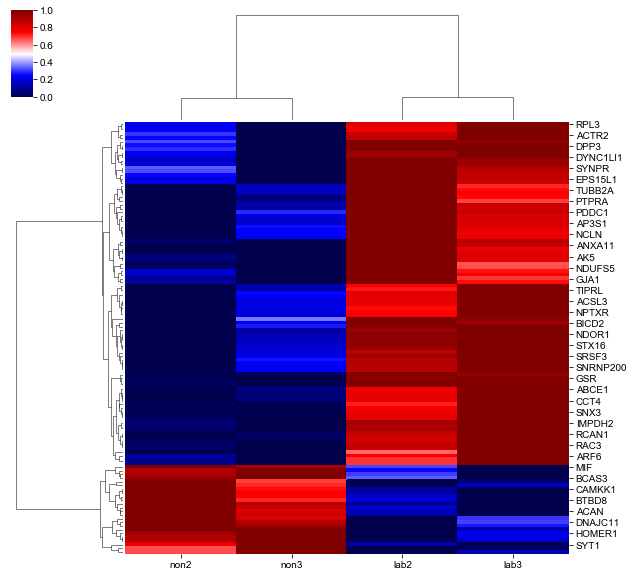

In [17]:
data=pd.read_csv('test.csv')
data=data.set_index(data.columns[0])
#Eliminate the sample batch effect
normdata=Pyomic.Density_norm(data,
                      depth=2,
                      legend=False,
                      norm_by=0,
                      xlim=1000,
                     )
mapping=pd.read_csv('C:/Users/FernandoZeng/Downloads/string_mapping.tsv',sep='\t')

data1=Pyomic.ID_mapping(normdata.dropna(),mapping,'queryItem','preferredName')
result=Pyomic.find_DEG(data1,eg=['lab2','lab3'],cg=['non2','non3'],fold_change=0.1,cmap="seismic")
result.to_csv('result.csv')

In [34]:
res.res2d.sort_index().head()

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
AMPK signaling pathway Homo sapiens hsa04152,0.149409,0.762659,0.800000,0.899548,124,22,TSC2;CPT1C;PCK2;PPP2R2A;PFKP;RHEB;RAB11B;PPP2C...,TSC2;CPT1C;PCK2;PPP2R2A;PFKP;RHEB;RAB11B;PPP2C...
Adherens junction Homo sapiens hsa04520,0.137068,0.717007,0.815385,0.898918,74,24,RAC3;ACTN2;ACTN4;CTNND1;WASL;MLLT4;ACTG1;ACTN1...,RAC3;ACTN2;ACTN4;CTNND1;WASL;MLLT4;ACTG1;ACTN1...
Adrenergic signaling in cardiomyocytes Homo sapiens hsa04261,-0.197193,-1.635527,0.060606,0.189466,148,45,GNAI2;PPP1CC;CACNA2D3;PPP2R2A;GNAS;PPP2CA;RYR2...,ADCY5;PRKCA;GNAI1;MAPK1;ATP2B2;AKT3;CACNA2D1;A...
Alcoholism Homo sapiens hsa05034,0.142452,0.932963,0.485294,0.890952,179,38,H3F3A;GNG12;GNAI2;PPP1CC;GRIN1;GNG3;GNG5;HRAS;...,H3F3A;GNG12;GNAI2;PPP1CC;GRIN1;GNG3;GNG5;HRAS;...
Aldosterone synthesis and secretion Homo sapiens hsa04925,-0.314807,-1.676686,0.000000,0.213195,81,19,GNAS;PRKCG;ADCY5;PRKCA;CAMK1D;CALM3;GNAQ;CAMK2...,CALM3;GNAQ;CAMK2B;PLCB1;PDE2A;ITPR1;CAMK2A;PRK...


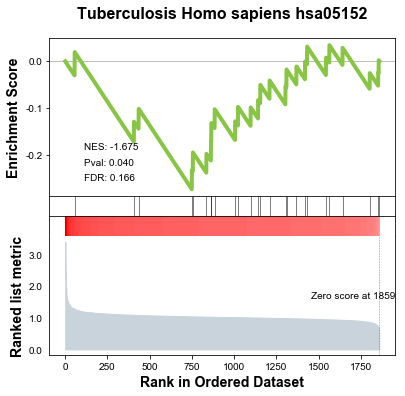

In [18]:
#result.csv file come from function(find_DEG)
result=pd.read_csv('result.csv')
result=result.set_index(result.columns[0])
res=Pyomic.enrichment_GSEA(result)
Pyomic.Plot_GSEA(res,0)